In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from matplotlib.image import imread
from cleanvision.imagelab import Imagelab

In [ ]:
#Carga del data frame adjunto al conjunto de datos

df=pd.read_csv(r"dataset/cards.csv")

print(df.head(20))

    class index                   filepaths        labels card type data set
0             0  train/ace of clubs/001.jpg  ace of clubs       ace    train
1             0  train/ace of clubs/002.jpg  ace of clubs       ace    train
2             0  train/ace of clubs/003.jpg  ace of clubs       ace    train
3             0  train/ace of clubs/004.jpg  ace of clubs       ace    train
4             0  train/ace of clubs/005.jpg  ace of clubs       ace    train
5             0  train/ace of clubs/006.jpg  ace of clubs       ace    train
6             0  train/ace of clubs/007.jpg  ace of clubs       ace    train
7             0  train/ace of clubs/008.jpg  ace of clubs       ace    train
8             0  train/ace of clubs/009.jpg  ace of clubs       ace    train
9             0  train/ace of clubs/010.jpg  ace of clubs       ace    train
10            0  train/ace of clubs/011.jpg  ace of clubs       ace    train
11            0  train/ace of clubs/012.jpg  ace of clubs       ace    train

In [4]:
# Agrupar el DataFrame y calcular las columnas requeridas para conocer el número y tipo de cartas que tenemos en los conjuntos.

grouped_df = df.groupby(['class index', 'labels', 'card type']).agg(
    Train=('data set', lambda x: (x == 'train').sum()),
    Test=('data set', lambda x: (x == 'test').sum()),
    Valid=('data set', lambda x: (x == 'valid').sum())
).reset_index()

print(grouped_df)

    class index             labels card type  Train  Test  Valid
0             0       ace of clubs       ace    121     5      5
1             1    ace of diamonds       ace    129     5      5
2             2      ace of hearts       ace    171     5      5
3             3      ace of spades       ace    181     5      5
4             4     eight of clubs     eight    138     5      5
5             5  eight of diamonds     eight    159     5      5
6             6    eight of hearts     eight    152     5      5
7             7    eight of spades     eight    135     5      5
8             8      five of clubs      five    150     5      5
9             9   five of diamonds      five    138     5      5
10           10     five of hearts      five    136     5      5
11           11     five of spades      five    158     5      5
12           12      four of clubs      four    157     5      5
13           13   four of diamonds      four    114     5      5
14           14     four 

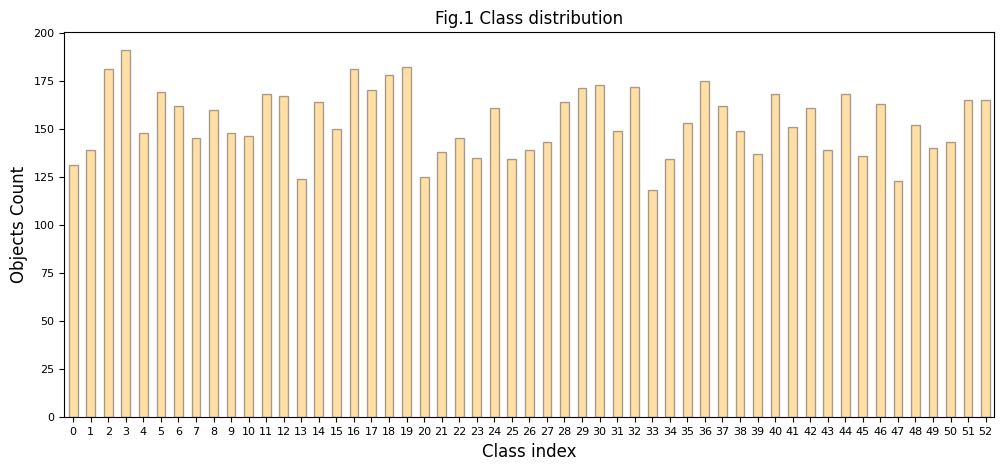

In [5]:
# Graficamos para mejor visualización.

df_labels = df.groupby(['class index', 'labels'], as_index=False).agg({'filepaths':'count'})

df_labels.plot(kind='bar',
                x='class index',
                fontsize=8, 
                rot=0, 
                figsize=(12,5), 
                legend=False,  
                edgecolor='black',
                color = 'orange',
                alpha=0.35).set_title('Fig.1 Class distribution')

plt.xlabel('Class index', fontsize=12)
plt.ylabel('Objects Count', fontsize=12)
plt.show()

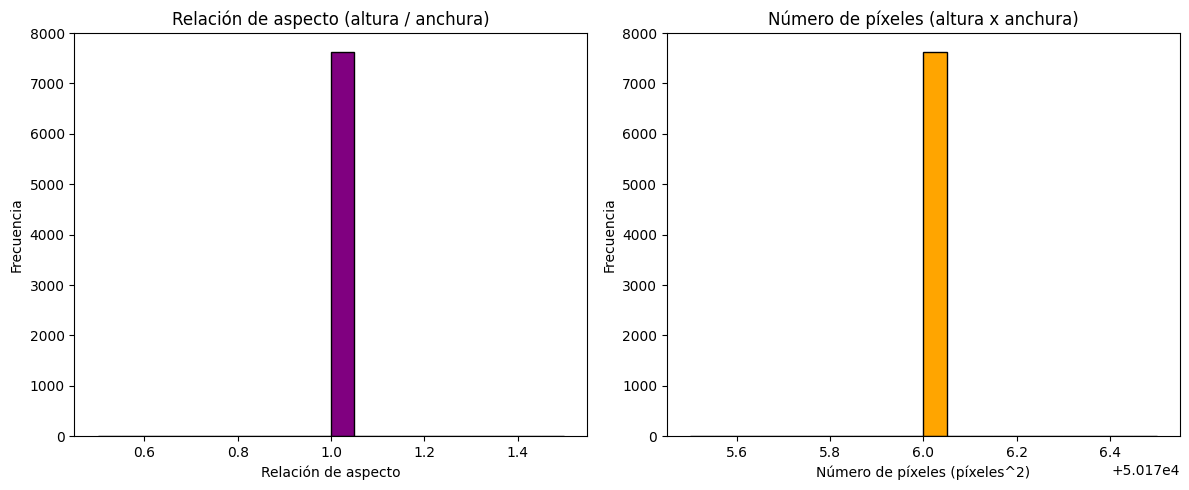

FORMATOS IMAGENES
Imagenes con forma: (224, 224, 3)
ESTRUCTURA DEL ARRAY


array([[[108, 109, 111],
        [135, 136, 138],
        [184, 185, 187],
        ...,
        [249, 253, 255],
        [253, 252, 255],
        [254, 253, 255]],

       [[156, 157, 159],
        [177, 178, 180],
        [213, 214, 216],
        ...,
        [247, 251, 254],
        [250, 249, 254],
        [251, 250, 255]],

       [[199, 203, 204],
        [212, 216, 217],
        [235, 239, 240],
        ...,
        [247, 251, 252],
        [249, 249, 251],
        [248, 248, 250]],

       ...,

       [[230, 238, 240],
        [234, 242, 244],
        [246, 251, 254],
        ...,
        [240, 249, 246],
        [243, 252, 249],
        [246, 255, 252]],

       [[222, 230, 232],
        [229, 237, 239],
        [243, 248, 251],
        ...,
        [245, 254, 251],
        [243, 252, 247],
        [242, 251, 246]],

       [[217, 225, 227],
        [225, 233, 235],
        [242, 247, 250],
        ...,
        [245, 254, 251],
        [239, 248, 243],
        [236, 245, 240]]

In [6]:
#Vamos a descubrir las características fisicas de nuestro conjunto de datos de train, es decir, relación de aspecto y tamaños de las imagenes.

train_dir = os.path.join(os.getcwd(), "dataset", "train")

# Listas para almacenar las dimensiones de las imágenes y la relación de aspecto

widths = []
heights = []
aspect_ratios = []
areas = []

for root, dirs, files in os.walk(train_dir):
    for file in files:
        # Consideramos formatos comunes de imagen
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            image_path = os.path.join(root, file)
            try:
                img = imread(image_path)
                # Si la imagen es a color (3 canales) o en escala de grises (2 dimensiones)
                if len(img.shape) == 3:
                    h, w, _ = img.shape
                else:
                    h, w = img.shape
                widths.append(w)
                heights.append(h)
                aspect_ratios.append(h / w)
                areas.append(w * h)
            except Exception as e:
                print(f"Error al leer {image_path}: {e}")

# Generar gráficos para la relación de aspecto y el número de píxeles
plt.figure(figsize=(12, 5))

# Gráfico de relación de aspecto
plt.subplot(1, 2, 1)
plt.hist(aspect_ratios, bins=20, color='purple', edgecolor='black')
plt.title('Relación de aspecto (altura / anchura)')
plt.xlabel('Relación de aspecto')
plt.ylabel('Frecuencia')

# Gráfico del número de píxeles
plt.subplot(1, 2, 2)
plt.hist(areas, bins=20, color='orange', edgecolor='black')
plt.title('Número de píxeles (altura x anchura)')
plt.xlabel('Número de píxeles (píxeles^2)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

print("FORMATOS IMAGENES")
print(f"Imagenes con forma: {img.shape}")

print("ESTRUCTURA DEL ARRAY")
imread(image_path)

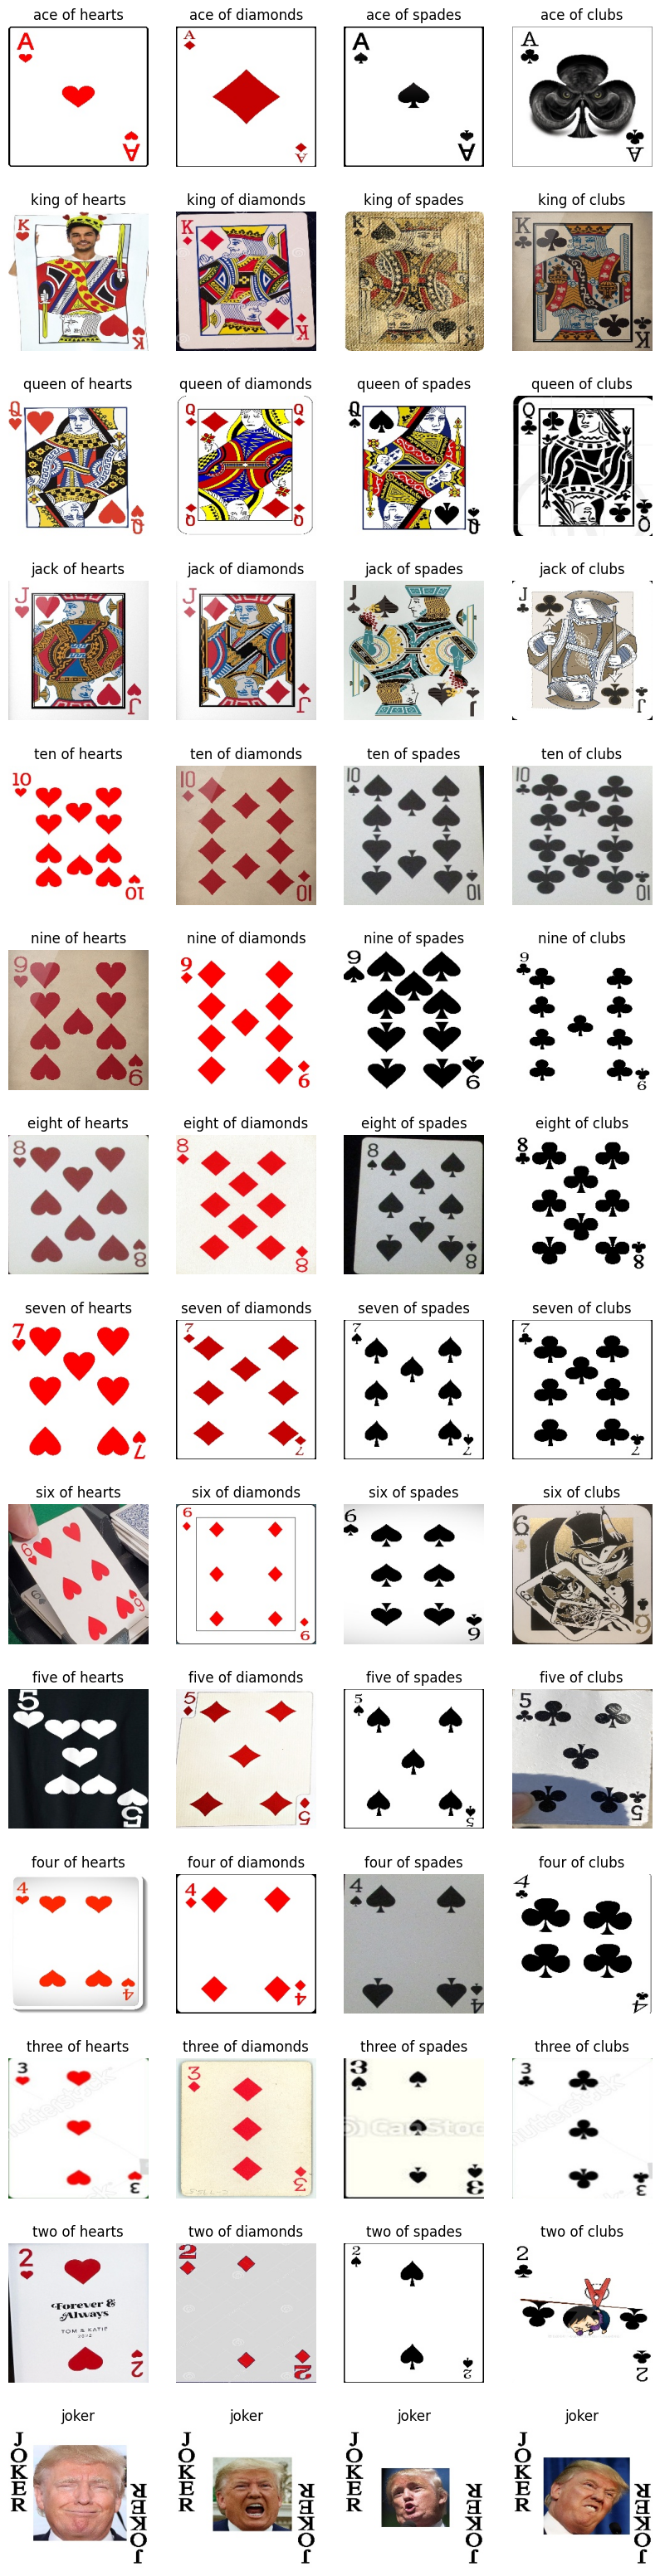

In [7]:
#Pequeña visualización del conjunto de datos.

sdir = os.path.join(os.getcwd(), "dataset")  

test_dir = os.path.join(sdir, "test")

ordered_list=[]

rank_list=['ace', 'king', 'queen', 'jack', 'ten', 'nine', 'eight', 'seven', 'six', 'five', 'four', 'three', 'two', 'joker']

for rank in rank_list:  
    for suite in ['hearts', 'diamonds', 'spades', 'clubs']: 
        name=rank + ' of ' + suite
        ordered_list.append(name)
        
classes=len(ordered_list)

fig = plt.figure(figsize=(10,40))

if classes % 4==0:
    rows=int(classes/4)
else:
    rows=int(classes/4) +1
    
jcount=1

for row in range(rows):
    for column in range(4):
        i= row * 4 + column
        if i>classes-1:
            break            
        card=ordered_list[i]
        if 'joker' in card:
            card_path=os.path.join(test_dir, 'joker')
            f_path=os.path.join(card_path, str(jcount)+ '.jpg')
            card='joker'
            jcount +=1            
        else:
            card_path=os.path.join(test_dir, card)
            f_path=os.path.join(card_path, '1.jpg')        
        img = mpimg.imread(f_path)        
        a = fig.add_subplot(rows, 4, i+1)
        imgplot=plt.imshow(img)
        a.axis("off")
        a.set_title(card)

In [9]:
#Uso de librería CLEANVISON para exploración profunda

# Carga imágenes
ds = Imagelab(train_dir)

# Reporte resumen de errores
error_report = ds.find_issues()

Reading images from c:/Users/66439464/Desktop/PEC1AP/dataset/train
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/7624 [00:00<?, ?it/s]

  0%|          | 0/7624 [00:00<?, ?it/s]

Issue checks completed. 235 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().


Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | low_information  |          105 |
|  1 | near_duplicates  |           82 |
|  2 | dark             |           27 |
|  3 | light            |           16 |
|  4 | exact_duplicates |            4 |
|  5 | blurry           |            1 |
|  6 | odd_aspect_ratio |            0 |
|  7 | odd_size         |            0 |
|  8 | grayscale        |            0 | 

------------------ low_information images ------------------

Number of examples with this issue: 105
Examples representing most severe instances of this issue:



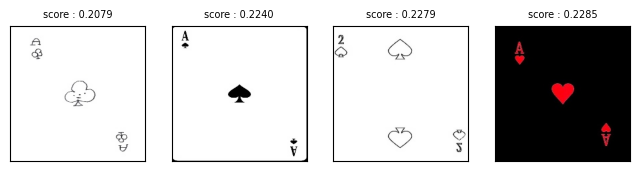

------------------ near_duplicates images ------------------

Number of examples with this issue: 82
Examples representing most severe instances of this issue:

Set: 0


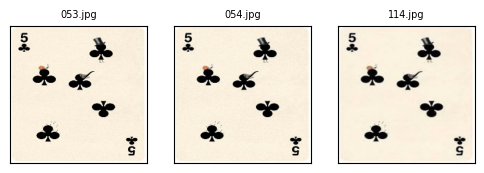

Set: 1


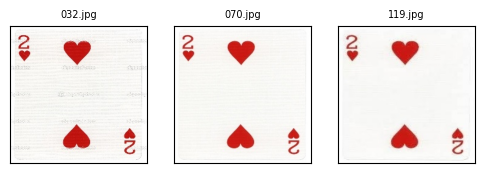

Set: 2


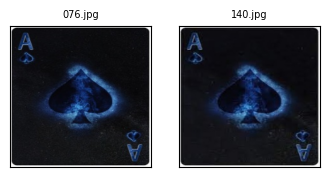

Set: 3


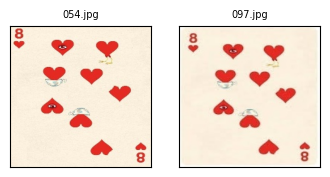

----------------------- dark images ------------------------

Number of examples with this issue: 27
Examples representing most severe instances of this issue:



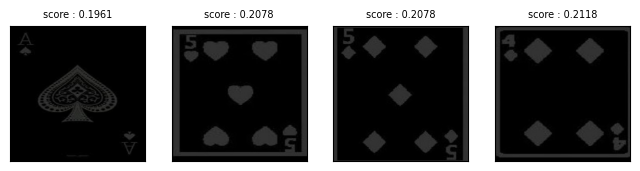

----------------------- light images -----------------------

Number of examples with this issue: 16
Examples representing most severe instances of this issue:



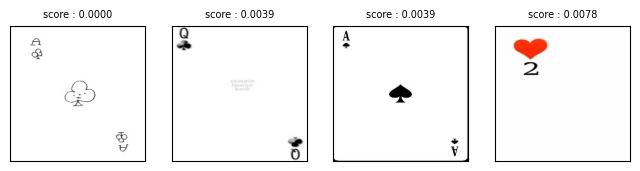

----------------- exact_duplicates images ------------------

Number of examples with this issue: 4
Examples representing most severe instances of this issue:

Set: 0


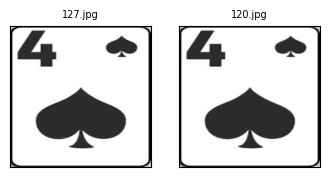

Set: 1


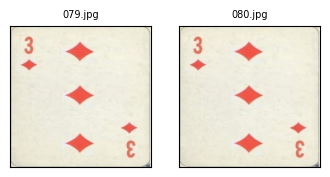

---------------------- blurry images -----------------------

Number of examples with this issue: 1
Examples representing most severe instances of this issue:



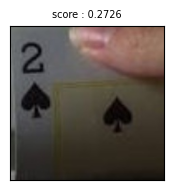

In [10]:
# Informe de errores
ds.report()